In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys 
sys.path.append(r"C:\Users\kirill_ionkin\Desktop\proga\Data_Science_and_same\YOLO")

In [3]:
sys.path

['C:\\Users\\kirill_ionkin\\Desktop\\proga\\Data_Science_and_same\\YOLO\\some_experiments',
 'C:\\Users\\kirill_ionkin\\miniconda3\\envs\\yolo_env\\python310.zip',
 'C:\\Users\\kirill_ionkin\\miniconda3\\envs\\yolo_env\\DLLs',
 'C:\\Users\\kirill_ionkin\\miniconda3\\envs\\yolo_env\\lib',
 'C:\\Users\\kirill_ionkin\\miniconda3\\envs\\yolo_env',
 '',
 'C:\\Users\\kirill_ionkin\\miniconda3\\envs\\yolo_env\\lib\\site-packages',
 'C:\\Users\\kirill_ionkin\\miniconda3\\envs\\yolo_env\\lib\\site-packages\\win32',
 'C:\\Users\\kirill_ionkin\\miniconda3\\envs\\yolo_env\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\kirill_ionkin\\miniconda3\\envs\\yolo_env\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\kirill_ionkin\\Desktop\\proga\\Data_Science_and_same\\YOLO']

In [4]:
import numpy as np

import sklearn

In [5]:
from code_helper import metrics

# p@K

In [6]:
# example 1

In [7]:
true_rang = [1, 0, 0, 1, 0, 1, 1]
pred_rang = [1, 1, 0, 0, 1, 0, 1]

In [8]:
true_rang = np.array(true_rang)
pred_rang = np.array(pred_rang)

In [9]:
true_rang

array([1, 0, 0, 1, 0, 1, 1])

In [10]:
pred_rang

array([1, 1, 0, 0, 1, 0, 1])

In [11]:
# для проверки, правильные ответы:
# 1, 0.5, 0.333, 0.5, 0.4, 0.5, 0.571

In [12]:
for k in range(1, 8):
    p_at_k = metrics.precision_at_k(y_true=true_rang, y_pred=pred_rang, k=k)
    print(f"k = {k}, precision_at_k={p_at_k:.3}")

k = 1, precision_at_k=1.0
k = 2, precision_at_k=0.5
k = 3, precision_at_k=0.333
k = 4, precision_at_k=0.5
k = 5, precision_at_k=0.4
k = 6, precision_at_k=0.5
k = 7, precision_at_k=0.571


In [13]:
# example 2

In [14]:
true_rang2 = np.array([1, 1, 1, 0, 0, 0, 0])
pred_rang2 = np.array([1, 1, 1, 1, 1, 1, 1])

In [15]:
# Для проверки, правильные ответы:
# 1, 1, 1, 0.75, 0.6, 0.5, 0.429

In [16]:
for k in range(1, 8):
    p_at_k = metrics.precision_at_k(y_true=true_rang2, y_pred=pred_rang2, k=k)
    print(f"k = {k}, precision_at_k={p_at_k:.3}")

k = 1, precision_at_k=1.0
k = 2, precision_at_k=1.0
k = 3, precision_at_k=1.0
k = 4, precision_at_k=0.75
k = 5, precision_at_k=0.6
k = 6, precision_at_k=0.5
k = 7, precision_at_k=0.429


# Average precision at K (ap@K)

In [17]:
# example 2

In [18]:
true_rang2

array([1, 1, 1, 0, 0, 0, 0])

In [19]:
pred_rang2

array([1, 1, 1, 1, 1, 1, 1])

In [20]:
for k in range(1, 8):
    p_at_k = metrics.average_precision_at_k(y_true=true_rang2, y_pred=pred_rang2, k=k)
    print(f"k = {k}, average_precision_at_k={p_at_k:.3}")

k = 1, average_precision_at_k=1.0
k = 2, average_precision_at_k=1.0
k = 3, average_precision_at_k=1.0
k = 4, average_precision_at_k=0.938
k = 5, average_precision_at_k=0.87
k = 6, average_precision_at_k=0.808
k = 7, average_precision_at_k=0.754


# Mean average precision at K(mAP@K)

In [21]:
# example from https://blog.paperspace.com/mean-average-precision/

In [22]:
y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive"]
pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3]

In [23]:
threshold = 0.5
y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]
print(y_pred)

['positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative']


In [29]:
r = np.flip(sklearn.metrics.confusion_matrix(y_true, y_pred))
print(r)

precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
print(precision)

recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
print(recall)

[[4 2]
 [1 3]]
0.8
0.6666666666666666


# Пример из статьи - Evaluating Object Detection Models Using Mean Average Precision (mAP)

https://blog.paperspace.com/mean-average-precision/

In [46]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

## From Prediction Score to Class Label

In [31]:
y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive"]

pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3]

In [34]:
threshold = 0.5
y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]

print("y_true: ", y_true)
print("y_pred: ", y_pred)

y_true:  ['positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive']
y_pred:  ['positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative']


In [33]:
r = np.flip(sklearn.metrics.confusion_matrix(y_true, y_pred))
print(r)

precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
print(precision)

recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
print(recall)

[[4 2]
 [1 3]]
0.8
0.6666666666666666


## Precision-Recall Curve

In [35]:
y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive", "positive", "positive", "positive", "negative", "negative", "negative"]

pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3, 0.7, 0.5, 0.8, 0.2, 0.3, 0.35]

thresholds = np.arange(start=0.2, stop=0.7, step=0.05)
thresholds

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65])

In [36]:
def precision_recall_curve(y_true, pred_scores, thresholds):
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]

        precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

In [53]:
precisions, recalls = precision_recall_curve(y_true, pred_scores, thresholds)
precisions, recalls

([0.5625,
  0.5714285714285714,
  0.5714285714285714,
  0.6363636363636364,
  0.7,
  0.875,
  0.875,
  1.0,
  1.0,
  1.0],
 [1.0,
  0.8888888888888888,
  0.8888888888888888,
  0.7777777777777778,
  0.7777777777777778,
  0.7777777777777778,
  0.7777777777777778,
  0.6666666666666666,
  0.5555555555555556,
  0.4444444444444444])

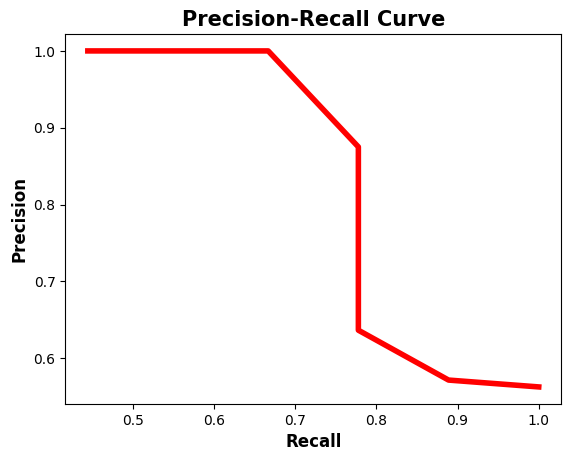

In [54]:
plt.plot(recalls, precisions, linewidth=4, color="red")
plt.xlabel("Recall", fontsize=12, fontweight='bold')
plt.ylabel("Precision", fontsize=12, fontweight='bold')
plt.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
plt.show()

## Average Precision (AP)

The average precision (AP) is a way to summarize the precision-recall curve into a single value representing the average of all precisions. The AP is calculated according to the next equation. Using a loop that goes through all precisions/recalls, the difference between the current and next recalls is calculated and then multiplied by the current precision. In other words, the AP is the weighted sum of precisions at each threshold where the weight is the increase in recall.

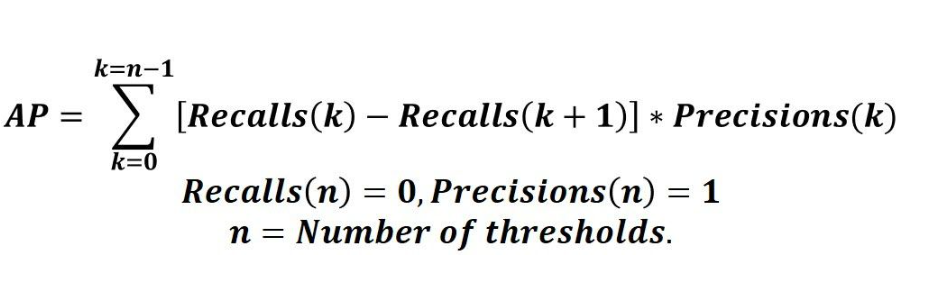

In [55]:
precisions.append(1)
recalls.append(0)

precisions = np.array(precisions)
recalls = np.array(recalls)

AP = np.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])
print(AP)

0.8898809523809523


## Intersection over Union (IoU)

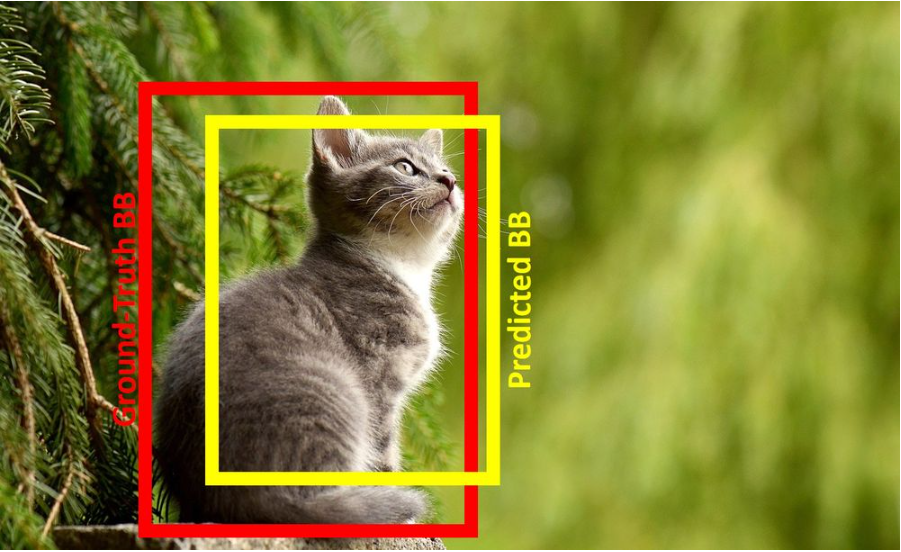

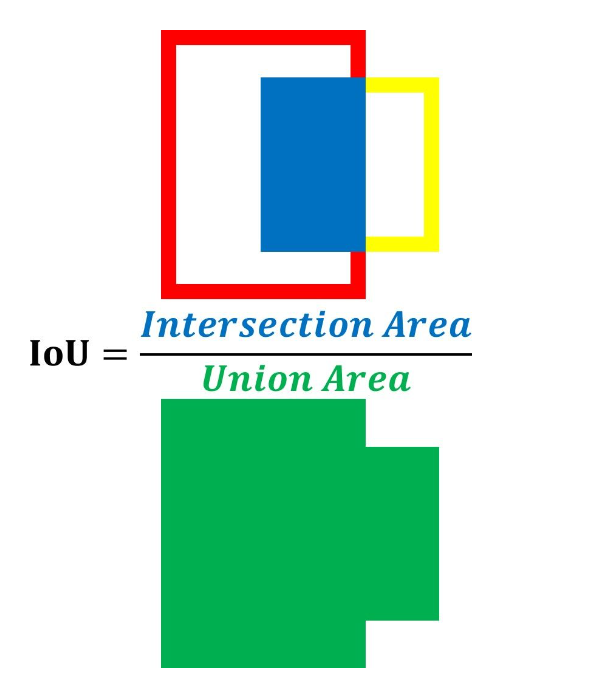

In [56]:
def intersection_over_union(gt_box, pred_box):
    inter_box_top_left = [max(gt_box[0], pred_box[0]), max(gt_box[1], pred_box[1])]
    inter_box_bottom_right = [min(gt_box[0]+gt_box[2], pred_box[0]+pred_box[2]), min(gt_box[1]+gt_box[3], pred_box[1]+pred_box[3])]

    inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
    inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]

    intersection = inter_box_w * inter_box_h
    union = gt_box[2] * gt_box[3] + pred_box[2] * pred_box[3] - intersection
    
    iou = intersection / union

    return iou, intersection, union

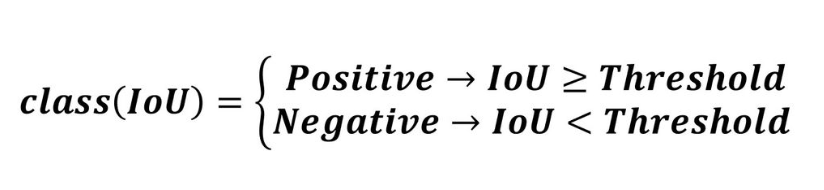

## Mean Average Precision (mAP) for Object Detection